In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import scanpy.external as sce

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.8.2 anndata==0.7.8 umap==0.5.3 numpy==1.21.6 scipy==1.8.0 pandas==1.4.2 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.10 pynndescent==0.5.6


In [3]:
raw_file = 'write_LCA/h_LCA1-5_raw.h5ad'
qc_file = 'write_LCA/h_LCA1-5_qc.h5ad'
filtered_file = 'write_LCA/h_LCA1-5_filtered.h5ad'
pp_file = 'write_LCA/h_LCA1-5_pp.h5ad'
results_file = 'write_LCA/h_LCA1-5.h5ad'  # the file that will store the analysis results

# Quality Control

### doublet detection by scrublet

In [4]:
adatas=sc.read_h5ad(raw_file)
adatas

AnnData object with n_obs × n_vars = 85233 × 41861
    obs: 'Barcode', 'Patient', 'Library', 'Most_likely_LM22_cell_type', 'Major_cell_type', 'Minor_subset'

In [5]:
# calculate qc metrics for regression
adatas.var['mt'] = adatas.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adatas, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [6]:
import scrublet

In [7]:
%matplotlib inline
import scrublet
adatas_new=[]
names = ['p3t1','p3t2','p3t3','p4t1','p4t2','p4t3','p5t1','p5t2','p6t1','p6t2','p7t1','p7t2']
for name in names:
    # extract a single sample from the raw data
    adata = adatas[adatas.obs.Library == name, :] 
    # use scrublet to predict doublets in data, the expected_doublet_rate set as the threshold in paper
    sc.external.pp.scrublet(adata, expected_doublet_rate=0.025) 
    #
    # reassembele the sample adata annotated with doublets
    adatas_new.append(adata)
    '''
    # doublet validation
    sc.external.pl.scrublet_score_distribution(adata,save='_'+name)
    # create the dimension-reduction plot and show the detected doublets
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, min_mean=0.05, max_mean=8, min_disp=0.5) 
    adata = adata[:, adata.var.highly_variable]
    #sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
    sc.pp.scale(adata, max_value=10)
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pp.neighbors(adata)
    sc.tl.tsne(adata)
    predicted_list=list(adata.obs['predicted_doublet'])   
    predicted_list_new = []
    for i in predicted_list:
        predicted_list_new.append(str(i))
    adata.obs['predicted_doublet_n']=predicted_list_new
    sc.pl.tsne(adata, color = ['predicted_doublet_n'],save='_'+name+'_doublet',title='predicted_doublet_'+name)
    '''

Running Scrublet
filtered out 19542 genes that are detected in less than 3 cells
filtered out 3 cells that have less than 3 genes expressed
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.43
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 7.7%
Overall doublet rate:
	Expected   = 2.5%
	Estimated  = 2.3%
    Scrublet finished (0:00:18)


Trying to set attribute `.obs` of view, copying.


Running Scrublet
filtered out 19191 genes that are detected in less than 3 cells
filtered out 3 cells that have less than 3 genes expressed
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.44
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 7.3%
Overall doublet rate:
	Expected   = 2.5%
	Estimated  = 3.1%
    Scrublet finished (0:00:19)


Trying to set attribute `.obs` of view, copying.


Running Scrublet
filtered out 18841 genes that are detected in less than 3 cells
filtered out 5 cells that have less than 3 genes expressed
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.45
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 3.7%
Overall doublet rate:
	Expected   = 2.5%
	Estimated  = 3.1%
    Scrublet finished (0:00:21)


Trying to set attribute `.obs` of view, copying.


Running Scrublet
filtered out 22769 genes that are detected in less than 3 cells
filtered out 11 cells that have less than 3 genes expressed
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell


/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.30
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 5.1%
Overall doublet rate:
	Expected   = 2.5%
	Estimated  = 5.8%
    Scrublet finished (0:00:07)


Trying to set attribute `.obs` of view, copying.


Running Scrublet
filtered out 22585 genes that are detected in less than 3 cells
filtered out 7 cells that have less than 3 genes expressed
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)


/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:182: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.33
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 2.5%
Overall doublet rate:
	Expected   = 2.5%
	Estimated  = 2.7%
    Scrublet finished (0:00:06)


Trying to set attribute `.obs` of view, copying.


Running Scrublet
filtered out 22209 genes that are detected in less than 3 cells
filtered out 11 cells that have less than 3 genes expressed
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.32
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 6.4%
Overall doublet rate:
	Expected   = 2.5%
	Estimated  = 3.1%
    Scrublet finished (0:00:08)


Trying to set attribute `.obs` of view, copying.


Running Scrublet
filtered out 21013 genes that are detected in less than 3 cells
filtered out 20 cells that have less than 3 genes expressed
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell


/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:182: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.42
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 3.2%
Overall doublet rate:
	Expected   = 2.5%
	Estimated  = 2.4%
    Scrublet finished (0:00:13)


Trying to set attribute `.obs` of view, copying.


Running Scrublet
filtered out 20606 genes that are detected in less than 3 cells
filtered out 3 cells that have less than 3 genes expressed
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.38
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 13.3%
Overall doublet rate:
	Expected   = 2.5%
	Estimated  = 2.7%
    Scrublet finished (0:00:12)


Trying to set attribute `.obs` of view, copying.


Running Scrublet
filtered out 21017 genes that are detected in less than 3 cells
filtered out 3 cells that have less than 3 genes expressed
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.38
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 9.2%
Overall doublet rate:
	Expected   = 2.5%
	Estimated  = 2.3%
    Scrublet finished (0:00:15)


Trying to set attribute `.obs` of view, copying.


Running Scrublet
filtered out 22486 genes that are detected in less than 3 cells
filtered out 8 cells that have less than 3 genes expressed
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.34
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 15.7%
Overall doublet rate:
	Expected   = 2.5%
	Estimated  = 3.6%
    Scrublet finished (0:00:11)


Trying to set attribute `.obs` of view, copying.


Running Scrublet
filtered out 19178 genes that are detected in less than 3 cells
filtered out 9 cells that have less than 3 genes expressed
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.43
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 5.9%
Overall doublet rate:
	Expected   = 2.5%
	Estimated  = 2.1%
    Scrublet finished (0:00:19)


Trying to set attribute `.obs` of view, copying.


Running Scrublet
filtered out 19536 genes that are detected in less than 3 cells
filtered out 5 cells that have less than 3 genes expressed
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.43
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 3.4%
Overall doublet rate:
	Expected   = 2.5%
	Estimated  = 3.1%
    Scrublet finished (0:00:20)


Trying to set attribute `.obs` of view, copying.


In [8]:
adatas_new

[AnnData object with n_obs × n_vars = 9534 × 41861
     obs: 'Barcode', 'Patient', 'Library', 'Most_likely_LM22_cell_type', 'Major_cell_type', 'Minor_subset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
     var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
     uns: 'scrublet',
 AnnData object with n_obs × n_vars = 9993 × 41861
     obs: 'Barcode', 'Patient', 'Library', 'Most_likely_LM22_cell_type', 'Major_cell_type', 'Minor_subset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
     var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
     uns: 'scrublet',
 AnnData object with n_obs × n_vars = 11267 × 41861
     obs: 'Barcode', 'Patient', 'Library', 'Most_likely_LM22_cell_type', 'Major_cell_type', 'Minor_subset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '

In [9]:
adatas_new = ad.concat(adatas_new, merge = "same")

In [10]:
adatas_new

AnnData object with n_obs × n_vars = 85233 × 41861
    obs: 'Barcode', 'Patient', 'Library', 'Most_likely_LM22_cell_type', 'Major_cell_type', 'Minor_subset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

### filter the doublets

In [12]:
adatas = adatas_new[adatas_new.obs.predicted_doublet == False, :] 

In [13]:
adatas
## 85233-84982=251 barcodes removed

View of AnnData object with n_obs × n_vars = 84982 × 41861
    obs: 'Barcode', 'Patient', 'Library', 'Most_likely_LM22_cell_type', 'Major_cell_type', 'Minor_subset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [14]:
del(adatas_new)

### filter by total_counts and mt_percent

In [ ]:
sc.pl.violin(adatas, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True,size =0.5)

/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1236: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.


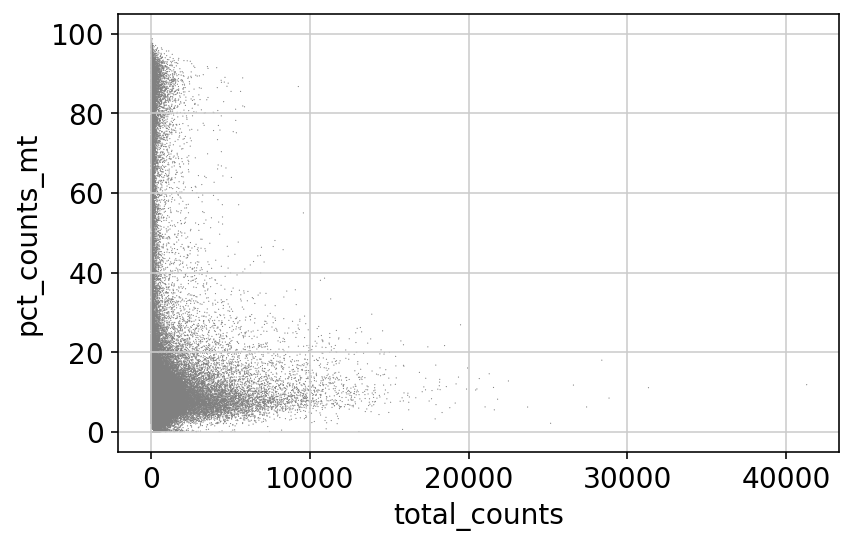

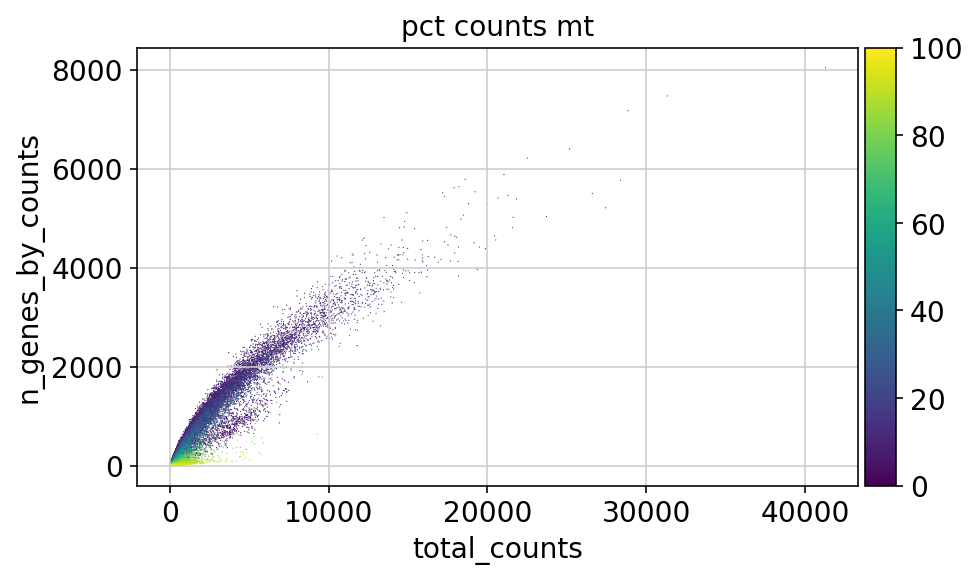

In [19]:
sc.pl.scatter(adatas, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adatas, x='total_counts', y='n_genes_by_counts',color='pct_counts_mt')

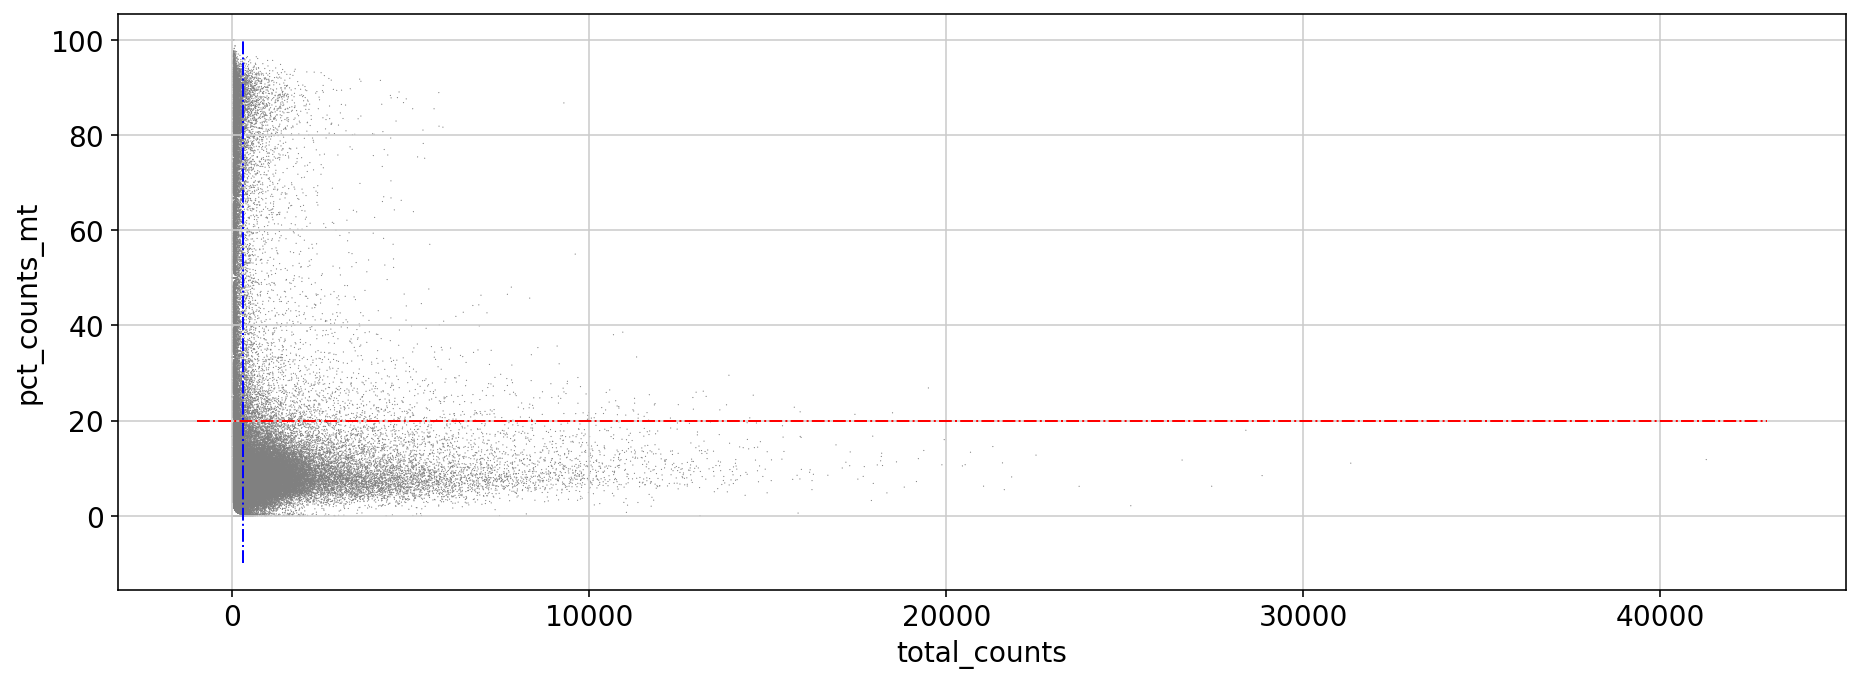

In [103]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
l1 = ax.plot([300,300],[-10,100],'b-.',linewidth='1')
l2 = ax.plot([-1000,43000],[20,20],'r-.',linewidth='1')
sc.pl.scatter(adatas, x='total_counts', y='pct_counts_mt', ax=ax)

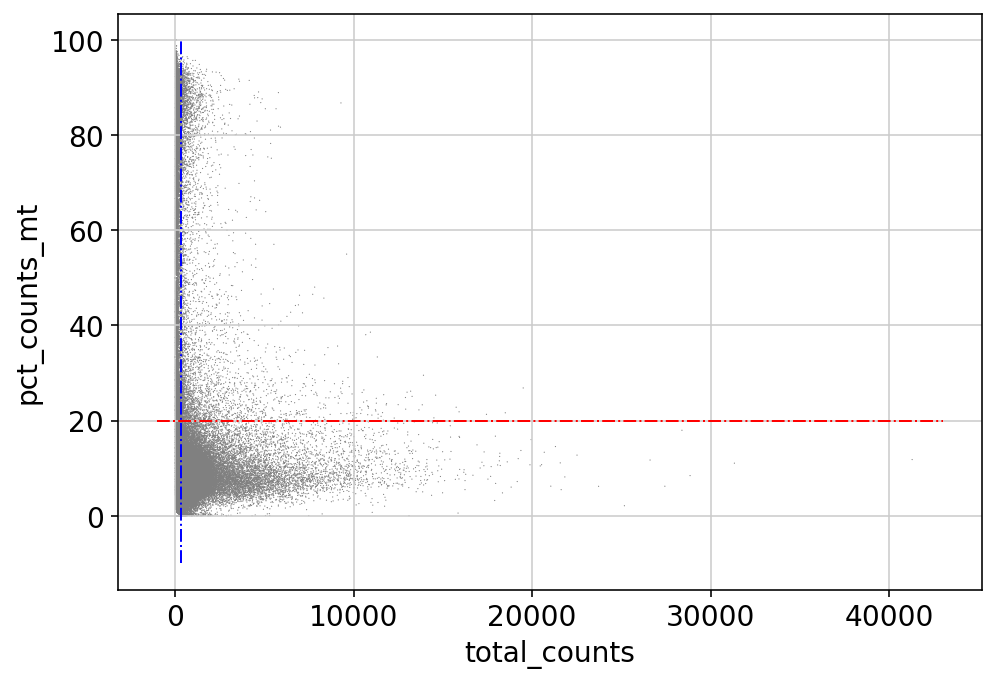

In [104]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
l1 = ax.plot([300,300],[-10,100],'b-.',linewidth='1')
l2 = ax.plot([-1000,43000],[20,20],'r-.',linewidth='1')
sc.pl.scatter(adatas, x='total_counts', y='pct_counts_mt', ax=ax)

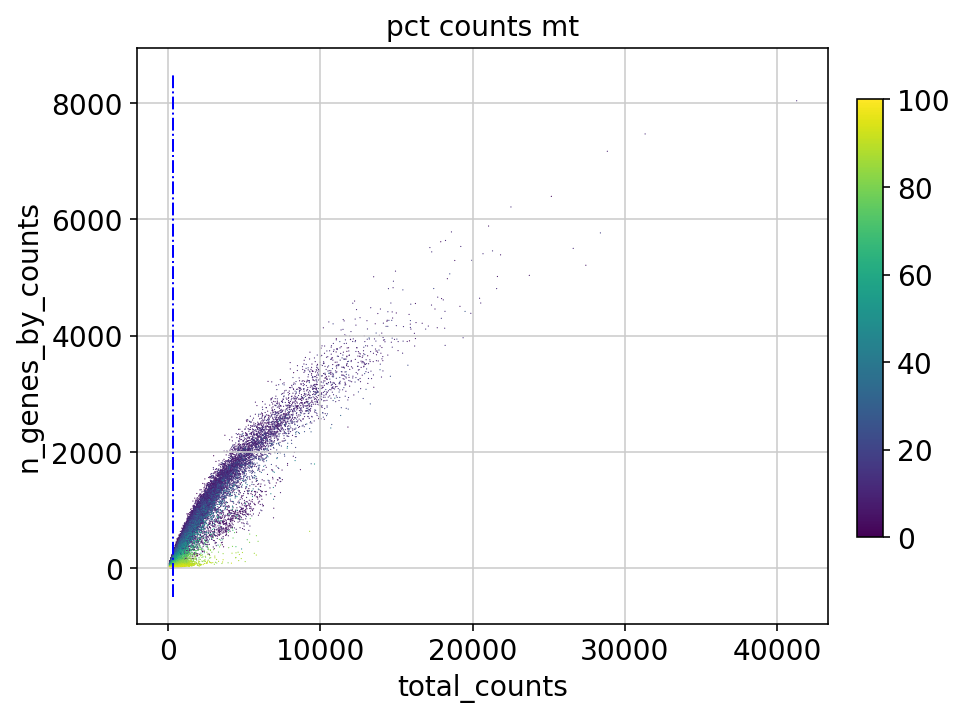

In [107]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,0.8,1])
l1 = ax.plot([300,300],[-500,8500],'b-.',linewidth='1')
sc.pl.scatter(adatas, x='total_counts', y='n_genes_by_counts',color='pct_counts_mt',ax=ax)

In [108]:
adatas = adatas[adatas.obs.total_counts >= 300, :] 
adatas = adatas[adatas.obs.pct_counts_mt <= 20, :] 
adatas

View of AnnData object with n_obs × n_vars = 32686 × 41861
    obs: 'Barcode', 'Patient', 'Library', 'Most likely LM22 cell type', 'Major cell type', 'Minor subset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [109]:
#del(adatas.obs['predicted_doublet'])
adatas.write(filtered_file)